# Homework 4
## Scott Marsden
### 4/18/20

For this assignment you will analyze Twitter data collected by researchers in Elon’s School of Education. The dataset consists of tweets sent between 3/18/16 and 5/31/16 which include the hashtag #enviroed, a topic used by educators interested in environmental education. The goal is to bring together and apply to a real-world dataset a wide variety of different analysis and visualization techniques you’ve used over the course of the semester with open-ended tasks that ask you to make an appropriate visualization and analyze it.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from operator import itemgetter
import networkx as nx
from networkx.algorithms import community
import tensorflow as tf
import nltk
import string
import re

In [2]:
tweets_df = pd.read_csv("twitter_enviroed.csv", sep=',')

In [3]:
tweets_df.head(6)

,Date,Screen Name,Full Name,Tweet Text,Tweet ID,App,Followers,Follows,Retweets,Favorites,Verfied,User Since,Location,Bio,Profile Image
0,3/15/16,@_Lightscap3s_,Otis,"RT @NatureBridge: ""NatureBridge is Highlight o...",7.100000e+17,RoundTeam,2644,590.0,1,0,No,6/8/09,"Carmel, IN","Artist @ Framed Lightscap3s LLC | Landscape, M...",View
1,3/21/16,@_Lightscap3s_,Otis,RT @NatureBridge: By 2050 we want more fish th...,7.120000e+17,RoundTeam,2641,587.0,2,0,No,6/8/09,"Carmel, IN","Artist @ Framed Lightscap3s LLC | Landscape, M...",View
2,4/6/16,@_Lindsay_Conway,Lindsay,RT @savageducates: Greenest School on #Earth s...,7.180000e+17,Twitter for iPhone,164,318.0,2,0,No,6/7/14,"Bratislava, Slovakia",International education. SEN interests. Adopti...,View
3,3/23/16,@_mcisneros19,Mirella Cisneros,A1: For math children could measure trunks to ...,7.130000e+17,TweetDeck,8,44.0,0,0,No,2/4/16,NaN,NaN,View
4,3/23/16,@_mcisneros19,Mirella Cisneros,A2: Going outside & letting children find the ...,7.130000e+17,TweetDeck,8,44.0,0,0,No,2/4/16,NaN,NaN,View
5,3/23/16,@_mcisneros19,Mirella Cisneros,A4: It is important to make Ss aware about the...,7.130000e+17,TweetDeck,8,44.0,0,1,No,2/4/16,NaN,NaN,View


Twitter for iPhone     1431
Twitter Web Client     1395
TweetDeck               924
Twitter for iPad        570
Twitter for Android     470
                       ... 
PicCollage iOS            1
TweetAppie                1
Food Sharer               1
Post Planner Inc.         1
JPTestApp123              1
Name: App, Length: 70, dtype: int64


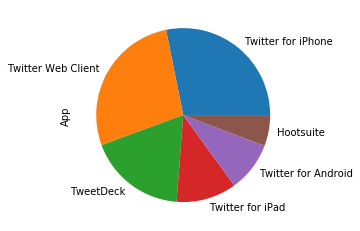

In [4]:
# What are your observations about how often the various apps 
#(e.g., TweetDeck, Twitter for iPhone) are used to tweet?

print(tweets_df['App'].value_counts())
mask = tweets_df['App'].value_counts() > 100
tweets_df['App'].value_counts()[mask].plot(kind='pie')
plt.show()


It appears that the majority of people tweet from either Twitter for Iphone or the Twitter web client. There is not a huge difference between these two and they make up around 50% of all tweets. The other notable apps used seem to be TweetDeck, Twitter for Ipad, Twitter for Android, and Hootsuite.

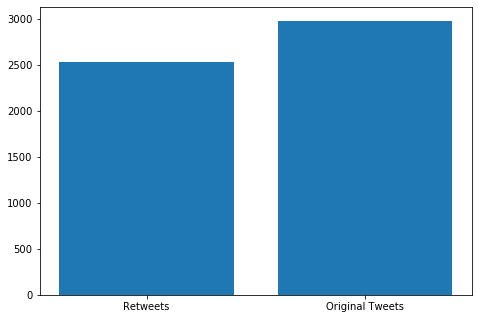

Retweets: 2532
Original: 2982


In [5]:
#What are your observations about how many original tweets there are compared to retweets?
retweets = tweets_df['Tweet Text'].str.startswith('RT @') 
rt = len(tweets_df[retweets]['Tweet Text'])
newTweets = len(tweets_df[~retweets]['Tweet Text'])
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
categories = ['Retweets', 'Original Tweets']
counts = [rt,newTweets]
ax.bar(categories,counts)
plt.show()
print("Retweets: " + str(rt))
print("Original: " + str(newTweets))

There are more original tweets than rewtweets but not by a huge margin. Retweets make up a little under half of all tweets in this data set.

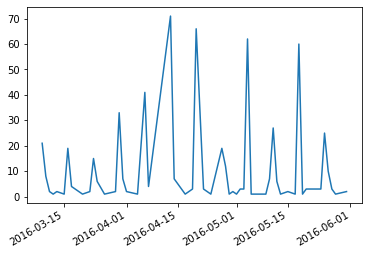

Value Counts: 2016-04-13    71
2016-04-20    66
2016-05-04    62
2016-05-18    60
2016-04-06    41
2016-03-30    33
2016-05-11    27
2016-05-25    25
2016-03-09    21
2016-03-16    19
2016-04-27    19
2016-03-23    15
2016-04-28    12
2016-05-26    10
2016-03-10     8
2016-04-14     7
2016-05-10     7
2016-03-31     7
2016-05-12     6
2016-03-24     6
2016-03-17     4
2016-04-07     4
2016-05-20     3
2016-04-19     3
2016-05-21     3
Name: Date, dtype: int64


In [6]:
# How often are there replies to tweets (showing interaction among people)
tweets_df['Date'] = pd.to_datetime(tweets_df['Date'])
tweets_df = tweets_df.sort_values(by='Date')
replies = tweets_df['Tweet Text'].str.startswith('@')
tweets_df[replies]['Date'].value_counts().plot(kind='line')
plt.show()
print('Value Counts: ' + str(tweets_df[replies]['Date'].value_counts().head(25)))

The highest tweeted on day is 4/20/16 and we can see that over time there are days with higher number of replies. May has the days with the highest number of replies. There are also only two days with double digits replies that are not Wednesday. The top 11 days are all Wednesdays.

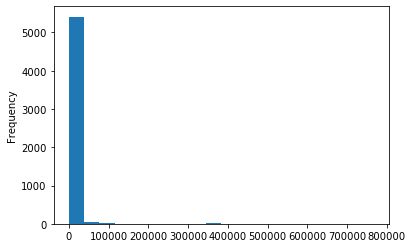

count      5514.000000
mean       3841.141821
std       22904.478321
min           0.000000
25%         311.000000
50%         761.000000
75%        2510.000000
max      765634.000000
Name: Followers, dtype: float64

In [7]:
#What are your observations about the distribution of followers counts 
#(i.e., how many other users were following the poster of a given tweet)? 
tweets_df["Followers"].plot.hist(bins = 20)
plt.show()
tweets_df["Followers"].describe()

It is clear based on the data that it is a very small faction of users that even have over 5000 followers. The histogram shows how dramatic the follower counts really are. It is a very small fraction of people that even bring the mean up to 3841. Over 75% of follower counts are below the mean of the data. The median is under 1000 followers.


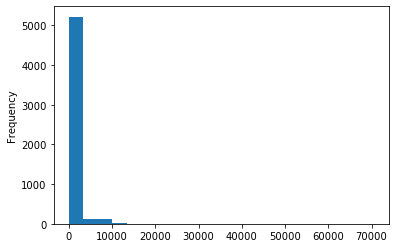

count     5513.000000
mean      1304.560312
std       2501.910217
min          0.000000
25%        324.000000
50%        834.000000
75%       1358.000000
max      70393.000000
Name: Follows, dtype: float64

In [8]:
# What are your observations about the distribution of follows counts (i.e., how many other accounts are followed by the poster of a given tweet)
# and how does it compare to the distribution of followers counts? 
tweets_df["Follows"].plot.hist(bins = 21)
plt.show()
tweets_df["Follows"].describe()

The data is pretty similar to that of the follower data. It is a little less extreme but the data is still changed by a few very large outliers. However, the outliers in the following data are much smaller than that of the followers data. The majority of people follow less than 1000 people and same goes for follwers. They both have extreme outliers but their are less outliers and they are much less extreme.

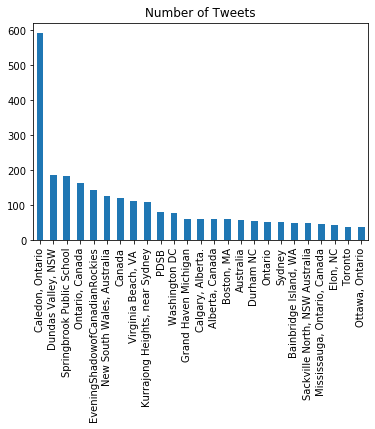

Value Counts: Caledon, Ontario                  592
Dundas Valley, NSW                187
Springbrook Public School         184
Ontario, Canada                   163
EveningShadowofCanadianRockies    142
New South Wales, Australia        126
Canada                            119
Virginia Beach, VA                112
Kurrajong Heights, near Sydney    110
PDSB                               81
Washington DC                      78
Grand Haven Michigan               60
Calgary, Alberta.                  60
Alberta, Canada                    59
Boston, MA                         59
Australia                          57
Durham NC                          54
Ontario                            53
Sydney                             52
Bainbridge Island, WA              49
Sackville North, NSW Australia     49
Mississauga, Ontario, Canada       45
Elon, NC                           44
Toronto                            38
Ottawa, Ontario                    37
Name: Location, dtype: int64


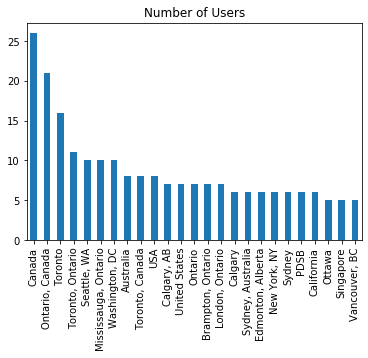

Value Counts: Canada                  26
Ontario, Canada         21
Toronto                 16
Toronto, Ontario        11
Seattle, WA             10
Mississauga, Ontario    10
Washington, DC          10
Australia                8
Toronto, Canada          8
USA                      8
Calgary, AB              7
United States            7
Ontario                  7
Brampton, Ontario        7
London, Ontario          7
Calgary                  6
Sydney, Australia        6
Edmonton, Alberta        6
New York, NY             6
Sydney                   6
PDSB                     6
California               6
Ottawa                   5
Singapore                5
Vancouver, BC            5
Name: Location, dtype: int64


In [9]:
# Where are people tweeting? We don’t have complete or easily parsed location data unfortunately. 
# For a quick analysis, we can use the Location column, which is populated based on whatever a given user added 
# in their profile on Twitter, although this may be blank or contain unhelpful information. Make two graphs 
# showing the top 25 locations, one based on number of tweets sent from that location, and one based on number of 
# users from that location.


tweets_df['Location'].value_counts().head(25).plot(kind = 'bar', title= "Number of Tweets")
plt.show()
print('Value Counts: ' + str(tweets_df['Location'].value_counts().head(25)))

screen_loc = tweets_df.drop_duplicates('Screen Name')
screen_loc['Location'].value_counts().head(25).plot(kind = 'bar', title= "Number of Users")
plt.show()
print('Value Counts: ' + str(screen_loc['Location'].value_counts().head(25)))

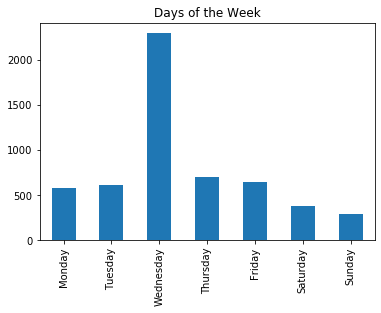

In [10]:
# When are people tweeting? Discuss your observations of when people tweet by analyzing the date column. 
#Make a graph showing the number of tweets sent for each day of the week (Monday through Sunday).

days_week = tweets_df['Date'].dt.day_name()
tweets_df.insert(1,"Day", days_week)
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
#days_week = days_week.astype('category', categories=cats, ordered=True)
#df_weekday = days_week.sum().reindex(cats)
days_week.reindex(cats)
days_week.value_counts().reindex(cats).plot(kind = 'bar', title= "Days of the Week")
#df_weekday = days_week.groupby().sum().reindex(days_week.value_counts())
#tweets_df['Day'] = tweets_df['Day'].astype('category', categories=cats, ordered=True)
#df_weekday['Day'].value_counts().plot(kind = 'bar', title= "Days of the Week")


In [11]:
tweets = tweets_df['Tweet Text']
tweets

4869    RT @IslandWood: Giving #educators a place to t...
4654    RT @kzelmer: Investigating measurement #enviro...
2196    "Climate deadline looms for African food crops...
2714    Investigating measurement #enviroed #reggioplc...
5052    RT @kzelmer: Investigating measurement #enviro...
                              ...                        
3114    RT @NAAEEStaff: Tomorrow is deadline to apply ...
2999    RT @AlistairWhitby: How to teach #kids they ca...
2010    RT @AlistairWhitby: How to teach #kids they ca...
3869    RT @RangerRidley: Hey @PeelSchools classes, I ...
2111    That's a bit of this, and that. #abed #enviroe...
Name: Tweet Text, Length: 5514, dtype: object

In [12]:
all_docs = []
stemmer = nltk.stem.porter.PorterStemmer()

for doc in tweets:
    # Make lowercase
    lowered = doc.lower()
    # Remove punctuation
    fixed = lowered.translate(str.maketrans('', '', string.punctuation))
    # Tokenize (splitting on whitespace, plus a few extras)
    tokens = nltk.word_tokenize(fixed)
    # Remove stop words
    # Option 1: Pythonic list comprehension
    #nonstop = [w for w in tokens if not w in nltk.corpus.stopwords.words('english')]
    # Option 2: More legible for loop
    nonstop = []
    for w in tokens:
        if w not in nltk.corpus.stopwords.words('english'):
            nonstop.append(w)
    # Stemming
    # Option 1: Pythonic list comprehension
    #tokens = [stemmer.stem(item) for item in nonstop]
    # Option 2: More legible for loop
    tokens = []
    for w in nonstop:
        tokens.append(stemmer.stem(w))
    # Add the current list of tokens to the list of all the lists of tokens
    all_docs.append(tokens)
#num_docs = len(all_docs)
#print('Processed', num_docs, 'documents.')
#print('First doc looks like this:', all_docs[0])


The 50 Most common terms (automatically sorted):
[('enviro', 5257), ('rt', 2561), ('rangerridley', 783), ('chat', 545), ('educ', 492), ('learn', 435), ('teacher', 431), ('natur', 410), ('student', 379), ('school', 369), ('great', 350), ('https…', 318), ('outdoor', 310), ('environment', 254), ('peelschool', 252), ('use', 246), ('love', 244), ('day', 238), ('epa', 235), ('may', 235), ('join', 234), ('earthday', 230), ('today', 220), ('classroom', 214), ('sustain', 213), ('get', 208), ('ss', 208), ('appli', 200), ('look', 198), ('kid', 194), ('time', 181), ('award', 178), ('week', 170), ('chrisvella2', 167), ('scienc', 166), ('make', 166), ('new', 165), ('april', 157), ('16', 157), ('ezecnsw', 157), ('paulkelba', 154), ('kinderkids123', 153), ('need', 152), ('thank', 150), ('field', 150), ('like', 148), ('us', 144), ('share', 144), ('class', 143), ('tree', 142)]


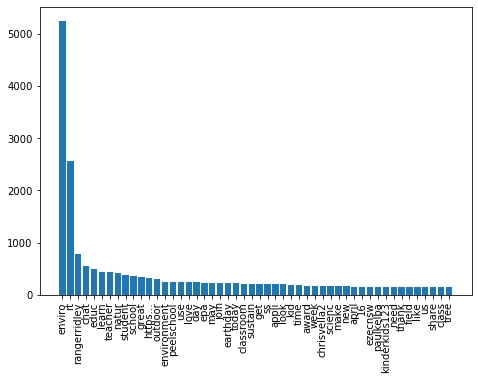

In [13]:
import itertools
tc = nltk.TextCollection(all_docs)
fdist = tc.vocab()
#print('# times "green" used:', fdist['green'])
# Number of unique words in the text
#unique_terms = list(fdist.keys())

#num_terms = len(unique_terms)
#print('\nUnique terms:', num_terms)
print('\nThe 50 Most common terms (automatically sorted):')
print(fdist.most_common(50))
words, values = zip(*fdist.most_common(50))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(words,values)
plt.xticks(rotation=90)
plt.show()

In [14]:
from collections import Counter
hashtags = []
counts = []
for doc in tweets:
    lowered = doc.lower()
    curr_hash = [i  for i in lowered.split() if i.startswith("#") ]
    for word in curr_hash:
        hashtags.append(word)

    #for word in lowered:
      #  if word.startswith('#'):
       #     hashtags.append(word)
hash_counts = Counter(hashtags)
hashtags = np.unique(hashtags)
#for num in range(0,len(hashtags)):
#    counts.append(0)
#for num in range(0,len(hashtags)):
 #   for hashes in hashtags:
 #       lowered = doc.lower()
 #       curr_hash = [i  for i in lowered.split() if i.startswith("#") ]
 #       for word in curr_hash:
#            if hashtags[num] == word:
#                counts[num] = counts[num] + 1
#keys = topHash.keys()
#topKeys = []
#for key in keys:
#    topHash[key]
hashtags = hash_counts.keys()

for key in hash_counts.keys():
       counts.append(hash_counts[key])
hashtags

dict_keys(['#educators', '#edequity', '#enviroed', '#woods2water', '#reggioplc', '#kinderchat', '#climatechange', '#science', '#waldorfeducation', '#woodtoys', '#wait5years', '#natureplay', '#playoutside', '#peel21st', '#yycbe', '#britanniafarm', '#sugarbush', '#enviro…', '#enviroed.', '#mees2016', '#eenews', '#eejobs', '#mees.', '#ece', '#ost', '#k12', '#mass', '#iee', '#bcedchat', '#teachers.', '#highered', '#edchat', '#toomanytoys', '#rps1to1', '#lf4515rocks', '#outdoorclassroom', '#ldnont', '#enviroe…', '#earthhour', '#consumption', '#dtk12chat', '#livedchat', '#ptchat', '#sblchat', '#neb…', '#ngsschat', '#citscichat', '#scistuchat', '#earthscience', '#ngss', '#scitlap', '#earthhour2016', '#kinderchat)', '#mbedchat.', '#greatresource', '#nebedchat', '#educa…', '#climatescience', '#oceans!', '#getoutside', '#neeac', '#epa', '#boston', '#advocacy', '#schoolgarden', '#gardenproduce', '#schoolkitchen', '#engagemath', '#environment:', '#whyiteach', '#eepro', '#cfp', '#naaee2016!', '#sto

In [15]:
hashs_df = pd.DataFrame(hashtags)
hashs_df.insert(1,"Counts", counts)
hashs_df = hashs_df.sort_values(by = ['Counts',0])


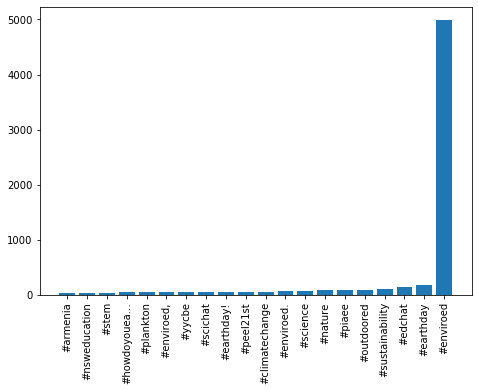

,0,Counts
133,#armenia,37
564,#nsweducation,37
91,#stem,37
313,#howdoyouea…,42
143,#plankton,43
199,"#enviroed,",48
14,#yycbe,48
339,#scichat,50
433,#earthday!,52
13,#peel21st,53


In [40]:
top20 = hashs_df.tail(20)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(top20[0],top20['Counts'])
plt.xticks(rotation=90)
plt.show()
top20

It appears based on both the various hashtags as well as the most common words in the tweets most of the tweets in the data set have to do with the environment, nature, and the Earth. The most common phrase in the entire data is a hashtag and it is enviroed. The data seems to be about educating people about the Earth and Ranger Ridley appears to be a key figure in all of this since his name is mentioned many times.


In [17]:
#Create a directed, weighted, social network graph where the nodes are the unique twitter users, the edges 
#indicate if a user has mentioned another user in a tweet, and the weights are a count of how many times the 
#user was mentioned.
tweeter = []
mentioned = []
for num in range(0,len(tweets)):
    mentions = []
    for user in tweets_df['Screen Name']:
        if user in tweets_df['Tweet Text'][num]:
            tweeter.append(tweets_df['Screen Name'][num])
            mentioned.append(user)

In [18]:
graph = pd.DataFrame(tweeter)
graph.insert(1,"Mentioned", mentioned)
#graph = pd.DataFrame(Boxes, columns= [0,'Mentioned'])

dups_color = graph.pivot_table(index=[0], aggfunc='size')

In [19]:
dups_mentioned = graph.pivot_table(index=[0,'Mentioned'], aggfunc='size')
#G = nx.Graph()
#for node in graph[0]:
    #G.add_node(node)

dups_mentioned

0                Mentioned       
@02Benson        @COrgbon              1
                 @GreeningForward      4
@109ThornKs      @RangerRidley       591
@1915Aurora      @ArmeniaTree         20
                 @CivilNetTV           2
                                    ... 
@yycbike2school  @doctormorrison      54
@zeiss_micro     @PlanktonPundit       5
@zoebadcock      @EPA                 12
@zwaste          @EPA                 12
                 @EPAregion2          21
Length: 2966, dtype: int64

In [20]:
graph = graph.drop_duplicates()

In [21]:
graph = graph.sort_values(by=[0,'Mentioned'])
graph

,0,Mentioned
234,@02Benson,@COrgbon
233,@02Benson,@GreeningForward
238,@109ThornKs,@RangerRidley
831,@1915Aurora,@ArmeniaTree
829,@1915Aurora,@CivilNetTV
...,...,...
651606,@yycbike2school,@doctormorrison
651732,@zeiss_micro,@PlanktonPundit
651749,@zoebadcock,@EPA
652411,@zwaste,@EPA


In [22]:
#graph.insert(2,"Weight", dups_mentioned)
weights = []
for num in range(0,len(dups_mentioned)):
    weights.append(dups_mentioned[num])
    
graph.insert(2,"Weight", weights)
graph

,0,Mentioned,Weight
234,@02Benson,@COrgbon,1
233,@02Benson,@GreeningForward,4
238,@109ThornKs,@RangerRidley,591
831,@1915Aurora,@ArmeniaTree,20
829,@1915Aurora,@CivilNetTV,2
...,...,...,...
651606,@yycbike2school,@doctormorrison,54
651732,@zeiss_micro,@PlanktonPundit,5
651749,@zoebadcock,@EPA,12
652411,@zwaste,@EPA,12


Name: 
Type: DiGraph
Number of nodes: 1511
Number of edges: 2966
Average in degree:   1.9629
Average out degree:   1.9629


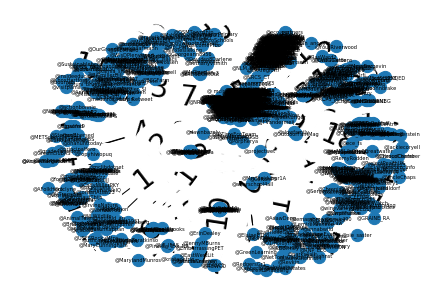

In [23]:
G = nx.DiGraph()
for index, row in graph.iterrows():
    currUser = row[0]
    currMent = row['Mentioned']
    currWeight = row['Weight']
    G.add_node(currUser)
    G.add_node(currMent)
    G.add_edge(currUser,currMent, weight = currWeight)


plt.figure()
pos = nx.spring_layout(G)
weights = nx.get_edge_attributes(G, 'weight')
nx.draw(G, with_labels=True, font_size=5, node_size=150, pos=pos, arrowsize=20)
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=weights, font_size=28)
print(nx.info(G))

In [24]:
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')
in_degree_dict = dict(G.in_degree(G.nodes()))
nx.set_node_attributes(G, in_degree_dict, 'in_degree')
out_degree_dict = dict(G.out_degree(G.nodes()))
nx.set_node_attributes(G, out_degree_dict, 'out_degree')
betweenness_dict = nx.betweenness_centrality(G) # Run betweenness centrality
nx.set_node_attributes(G, betweenness_dict, 'betweenness')
eigenvector_dict = nx.eigenvector_centrality(G) # Run eigenvector centrality
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')

In [25]:
from operator import itemgetter

sorted_in_degree = sorted(in_degree_dict.items(), key=itemgetter(1), reverse=True)
print("Top 20 Users by in degree:")
for b in sorted_in_degree[:20]:
    print(b)
sorted_out_degree = sorted(out_degree_dict.items(), key=itemgetter(1), reverse=True)
print("Top 20 Users by out degree:")
for b in sorted_out_degree[:20]:
    print(b)
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)
print("Top 20 Users by betweenness centrality:")
for b in sorted_betweenness[:20]:
    print(b)
sorted_eigenvector = sorted(eigenvector_dict.items(), key=itemgetter(1), reverse=True)
print("Top 20 Users by betweenness centrality:")
for b in sorted_betweenness[:20]:
    print(b)

Top 20 Users by in degree:
('@RangerRidley', 245)
('@EPA', 169)
('@PeelSchools', 91)
('@EnviroEducators', 70)
('@PaulKelba', 60)
('@KinderKids123', 54)
('@CWF_FCF', 48)
('@PDSB_eco', 45)
('@IslandWood', 45)
('@ChrisVella2', 41)
('@NAAEEStaff', 40)
('@Sierra_BC', 39)
('@stevenbody', 39)
('@MindShiftKQED', 38)
('@KinderFynes', 38)
('@EZECNSW', 37)
('@CreativeSTAR', 36)
('@ON_EcoSchools', 35)
('@PlanktonPundit', 35)
('@AlbertaEE', 34)
Top 20 Users by out degree:
('@RangerRidley', 104)
('@DavidSpencerEdu', 47)
('@PaulKelba', 37)
('@Learn_OnTheFly', 37)
('@stevenbody', 29)
('@EZECNSW', 28)
('@ChrisVella2', 27)
('@KinderKids123', 18)
('@CWF_FCF', 16)
('@doctormorrison', 14)
('@WestSydUFood_Ag', 14)
('@OCSBeco', 14)
('@PDSB_eco', 13)
('@MikeBartlettEdu', 13)
('@vivianharris45', 13)
('@KinderFynes', 12)
('@NAAEEStaff', 12)
('@PeelSchools', 11)
('@BearTrust', 11)
('@BrewongleEEC', 11)
Top 20 Users by betweenness centrality:
('@RangerRidley', 0.0592180253584604)
('@PaulKelba', 0.0182376313017921

@RangerRidley is at the top of all the lists so clearly this person is very important in regards to most of the tweets. A lot of tweets mention this person and this person mentions the most people making it also the most central node. Another node that stands out in most of the lists is @PaulKelba. There are a few other nodes that make an appearance on all the lists.

In [26]:
#Pick three Twitter users (nodes) for further exploration. Make a graph visualization for each of 
#the user’s subgraphs by using Gephi, similar to lab 12.

nodes_ridley = ['@RangerRidley']

edges_ridley = []
for edge in G.edges:
    if edge[0] == '@RangerRidley':
        nodes_ridley.append(edge[1])
        edges_ridley.append(edge)
    elif edge[1] == '@RangerRidley':
        nodes_ridley.append(edge[0])
        edges_ridley.append(edge)

Name: 
Type: DiGraph
Number of nodes: 284
Number of edges: 982
Average in degree:   3.4577
Average out degree:   3.4577


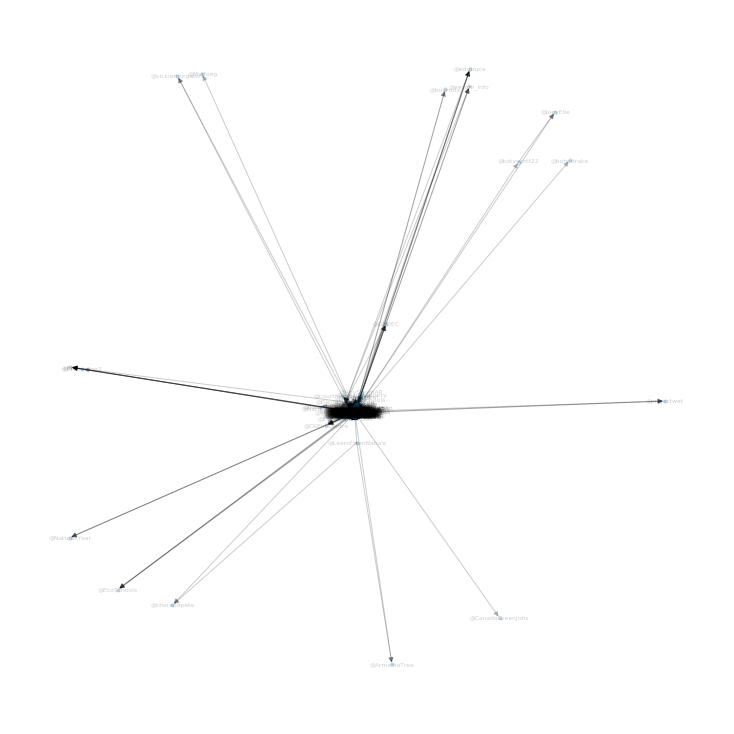

In [27]:
G2 = G.subgraph(nodes_ridley)

print(nx.info(G2))
plt.figure(figsize=(10,10))
nx.draw(G2, with_labels=True, font_size=6, node_size=10, alpha=0.2)
plt.show()

In [28]:
# Export the subgraph

nx.write_gexf(G2, '@RangerRidley.gexf')

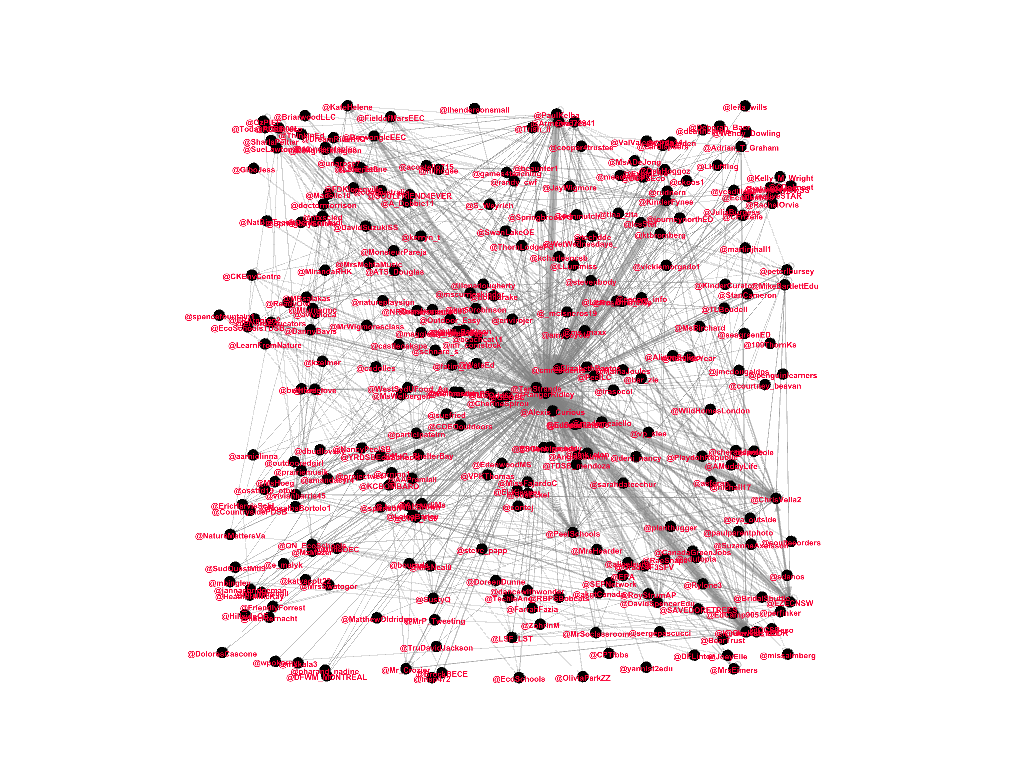

In [29]:
from IPython.display import Image
Image('sna_rangerRidley_peers.png')

In [30]:
#Pick three Twitter users (nodes) for further exploration. Make a graph visualization for each of 
#the user’s subgraphs by using Gephi, similar to lab 12.

nodes_paul = ['@PaulKelba']

edges_paul = []
for edge in G.edges:
    if edge[0] == '@PaulKelba':
        nodes_paul.append(edge[1])
        edges_paul.append(edge)
    elif edge[1] == '@PaulKelba':
        nodes_paul.append(edge[0])
        edges_paul.append(edge)

Name: 
Type: DiGraph
Number of nodes: 71
Number of edges: 288
Average in degree:   4.0563
Average out degree:   4.0563


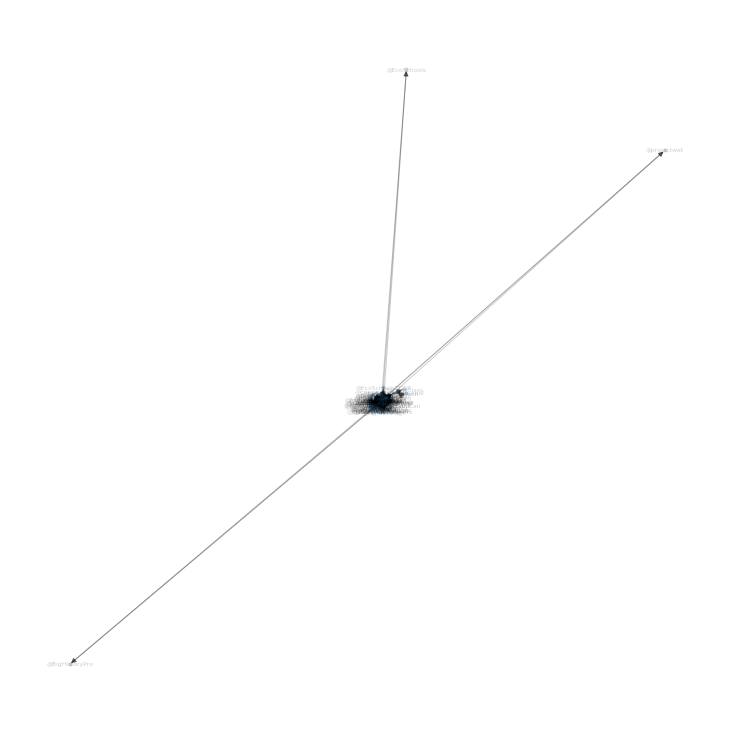

In [31]:
G2 = G.subgraph(nodes_paul)

print(nx.info(G2))
plt.figure(figsize=(10,10))
nx.draw(G2, with_labels=True, font_size=6, node_size=10, alpha=0.2)
plt.show()

In [32]:
# Export the subgraph

nx.write_gexf(G2, '@PaulKelba.gexf')

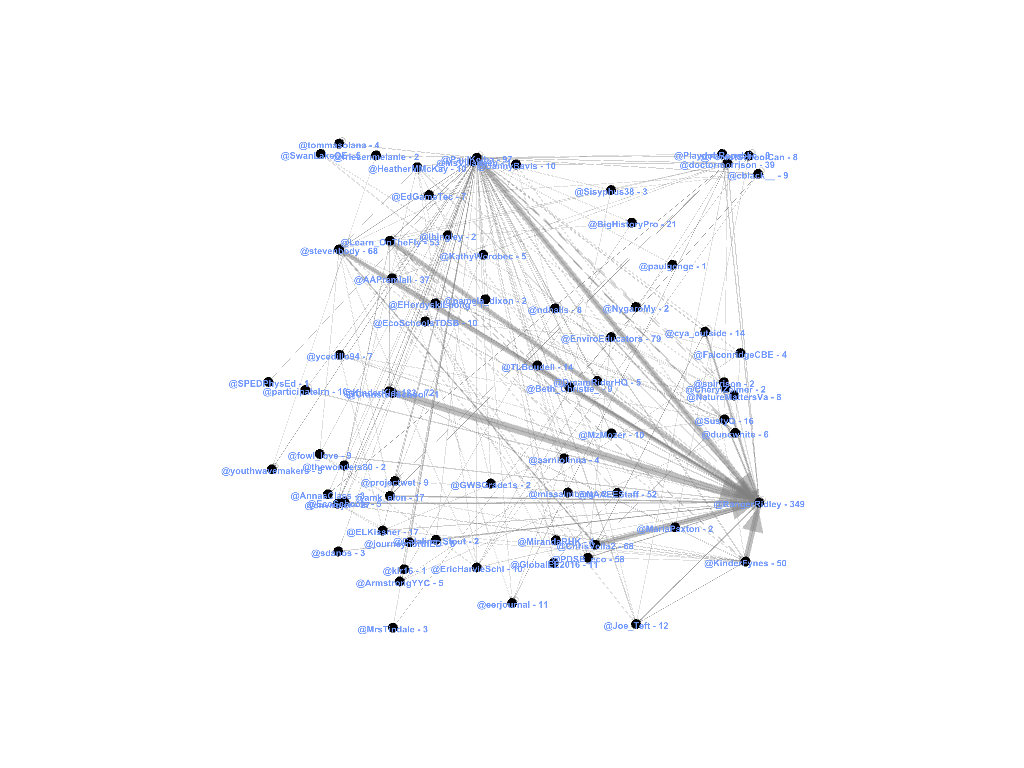

In [33]:
from IPython.display import Image
Image('sna_paulKelba_peers.png')

In [34]:
#Pick three Twitter users (nodes) for further exploration. Make a graph visualization for each of 
#the user’s subgraphs by using Gephi, similar to lab 12.

nodes_eco = ['@ON_EcoSchools']

edges_eco = []
for edge in G.edges:
    if edge[0] == '@ON_EcoSchools':
        nodes_eco.append(edge[1])
        edges_eco.append(edge)
    elif edge[1] == '@ON_EcoSchools':
        nodes_eco.append(edge[0])
        edges_eco.append(edge)

Name: 
Type: DiGraph
Number of nodes: 35
Number of edges: 127
Average in degree:   3.6286
Average out degree:   3.6286


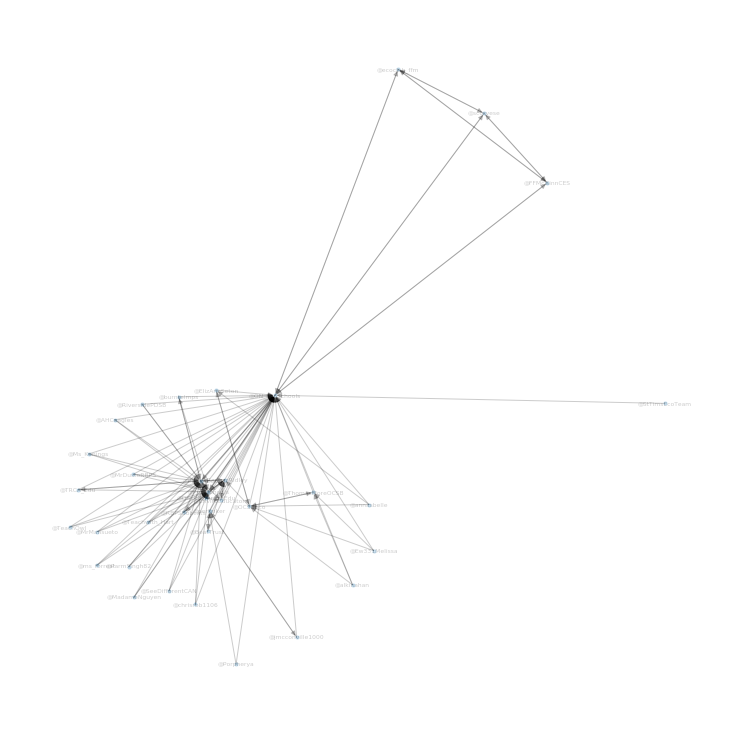

In [35]:
G2 = G.subgraph(nodes_eco)

print(nx.info(G2))
plt.figure(figsize=(10,10))
nx.draw(G2, with_labels=True, font_size=6, node_size=10, alpha=0.2)
plt.show()

In [36]:
# Export the subgraph

nx.write_gexf(G2, '@ON_EcoSchools.gexf')

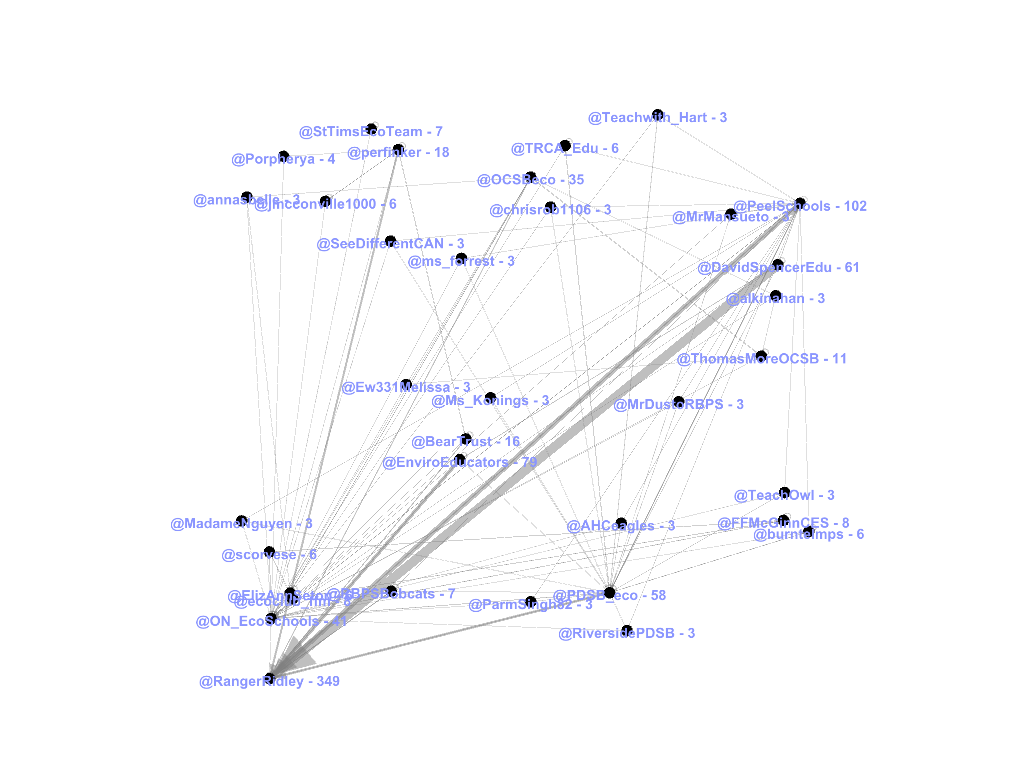

In [37]:
from IPython.display import Image
Image('sna_ecoschools_peers.png')

@PaulKelba has a very dense and very populated graph. I chose him because I wanted to see what his graph looked like since his name appeared close to the top of every top 20 list. Compared to @RangerRidley, however, his graph is quite small since his graph is much more populated and dense. 1/3 of the edges in the complete graph are a part of this subgraph. The last one chosen was @ON_EcoSchools and I chose this one because I wanted to be able to compare the other two to someone much lower in the top 20. It is still a populated graph but the graph is easier to understand since there are not nearly as many connections. Interestingly @RangerRidley is a key point in all three graphs which highlights how critical this user is to all the connections.

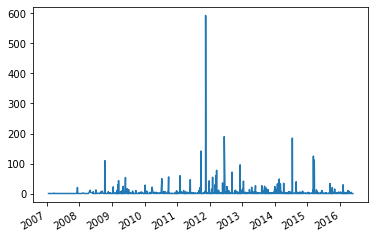

Value Counts: 2011-11-17    592
2012-06-13    190
2014-07-16    185
2011-09-24    142
2015-03-09    125
2015-03-19    112
2008-10-13    110
2012-12-08     96
2012-03-19     78
2012-09-08     72
2011-02-04     60
2012-03-10     60
2010-09-28     56
2012-02-03     55
2009-06-01     54
2010-07-14     50
2014-02-19     49
2011-05-29     47
2009-03-16     44
2011-12-26     43
2013-01-14     42
2014-08-28     40
2012-05-25     36
2014-04-10     35
2015-09-11     34
Name: User Since, dtype: int64


In [38]:
# When did people become twitter users?

tweets_df['User Since'] = pd.to_datetime(tweets_df['User Since'])
tweets_df = tweets_df.sort_values(by='User Since')
#replies = tweets_df['Tweet Text'].str.startswith('@')
tweets_df['User Since'].value_counts().plot(kind='line')
plt.show()
print('Value Counts: ' + str(tweets_df['User Since'].value_counts().head(25)))


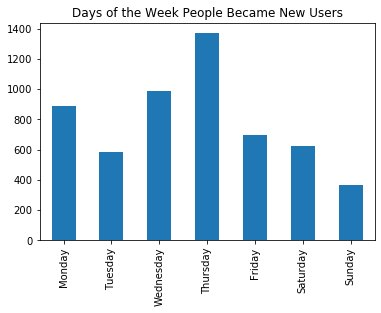

In [39]:
new_user_day = tweets_df['User Since'].dt.day_name()
#tweets_df.insert(1,"Day", days_week)
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
#days_week = days_week.astype('category', categories=cats, ordered=True)
#df_weekday = days_week.sum().reindex(cats)
new_user_day.reindex(cats)
new_user_day.value_counts().reindex(cats).plot(kind = 'bar', title= "Days of the Week People Became New Users")

The above graphs show what the most popular day of the week is to become a twitter user as well as what the most popular date is to become a twitter user. Surpringly, Thursday is the most popular day to become a user even though Wednesday is the most popular day to tweet. In regards to dates to become users there is a huge peak on November 17, 2011. I searched in an attempt to figure out why so many people became users on that day specifically and could not find any significant news that happened on that day to create a spike that large.